---
## Time Series
---

<!---Create stock_df and save as .pkl
stocks_df = pd.read_csv("raw_data/all_stocks_5yr.csv")
stocks_df["clean_date"] = pd.to_datetime(stocks_df["date"], format="%Y-%m-%d")
stocks_df.drop(["date", "clean_date", "volume", "Name"], axis=1, inplace=True)
stocks_df.rename(columns={"string_date": "date"}, inplace=True)
pickle.dump(stocks_df, open("write_data/all_stocks_5yr.pkl", "wb"))
--->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
stocks_df = pickle.load(open("write_data/all_stocks_5yr.pkl", "rb"))
stocks_df.head()

,open,high,low,close,date
0,15.07,15.12,14.63,14.75,"February 08, 2013"
1,14.89,15.01,14.26,14.46,"February 11, 2013"
2,14.45,14.51,14.10,14.27,"February 12, 2013"
3,14.30,14.94,14.25,14.66,"February 13, 2013"
4,14.94,14.96,13.16,13.99,"February 14, 2013"


### 1. Transform the `date` feature so that it becomes a `datetime` object that contains the following format: YYYY-MM-DD and set `date` to be the index of `stocks_df`.

In [3]:
stocks_df["date"] = pd.to_datetime(stocks_df["date"], format="%B %d, %Y")
stocks_df.set_index(keys="date", inplace=True)
stocks_df.head()

,open,high,low,close
date,,,,
2013-02-08,15.07,15.12,14.63,14.75
2013-02-11,14.89,15.01,14.26,14.46
2013-02-12,14.45,14.51,14.10,14.27
2013-02-13,14.30,14.94,14.25,14.66
2013-02-14,14.94,14.96,13.16,13.99


### 2. Perform monthly upsampling on `stocks_df` that takes the mean of the `open`, `high`, `low`, and `close` features on an annual basis. Store the results in `stocks_monthly_df`.

> Hint: `stocks_monthly_df` should have 61 rows and 4 columns after you perform upsampling.

In [4]:
stocks_monthly = stocks_df.resample("MS")
stocks_monthly_df = stocks_monthly.mean()
stocks_monthly_df.head()

,open,high,low,close
date,,,,
2013-02-01,58.135082,58.656064,57.600095,58.106483
2013-03-01,59.430461,59.924352,58.986414,59.531515
2013-04-01,60.261989,60.829809,59.653234,60.294833
2013-05-01,63.189973,63.854413,62.681440,63.284582
2013-06-01,62.080930,62.672076,61.373427,61.994978


In [5]:
stocks_monthly_df.shape

(61, 4)

### 3. Create a line graph that visualizes the monthly open stock prices from `stocks_monthly_df`. Identify if the plot is stationary or not using the rolling mean and rolling standard deviation.

> Hint: 
> * store your sliced version of `stocks_monthly_df` in a new DataFrame called `open_monthly_df`;
> * use a window size of 3 to represent one quarter of time in a year

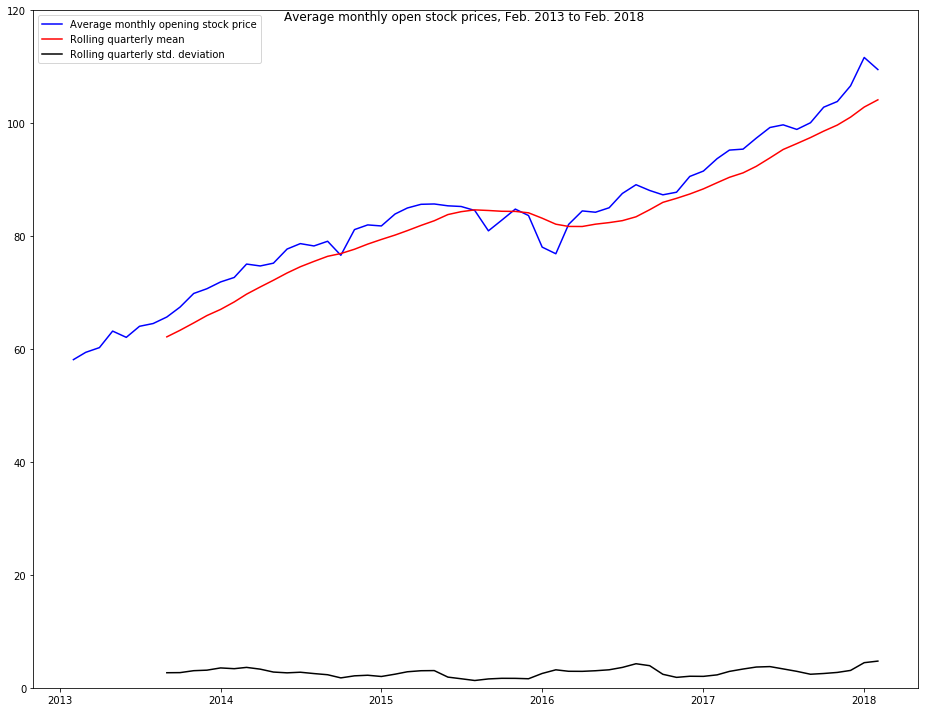

In [6]:
open_monthly_df = stocks_monthly_df.loc[:, "open"]

rolmean = open_monthly_df.rolling(window = 8, center = False).mean()
rolstd = open_monthly_df.rolling(window = 8, center = False).std()

fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(open_monthly_df, color="blue",label="Average monthly opening stock price")
ax.plot(rolmean, color="red", label="Rolling quarterly mean")
ax.plot(rolstd, color="black", label="Rolling quarterly std. deviation")
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle("Average monthly open stock prices, Feb. 2013 to Feb. 2018")
fig.tight_layout()

### 4. Remove the trends in `open_monthly_df` so that it is stationary

> Hint: should we tell them to take the log, subtract the rolling mean, or differencing?

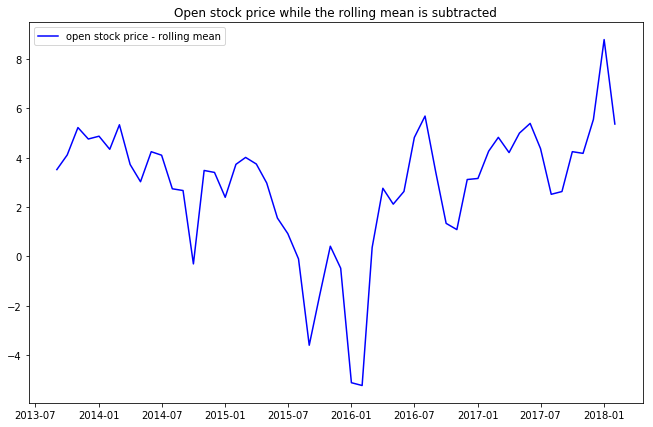

In [7]:
data_minus_rolmean = open_monthly_df - rolmean
data_minus_rolmean.dropna(inplace=True)
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='open stock price - rolling mean')
plt.legend(loc='best')
plt.title('Open stock price while the rolling mean is subtracted')
plt.show(block=False)
fig.tight_layout()

### 5. Another method for removing trends is decomposition. Visualize the trend, seasonality, and noise of the decomposition object.

> Hint: Be sure to import the necessary module `from statsmodels.tsa.seasonal import seasonal_decompose`

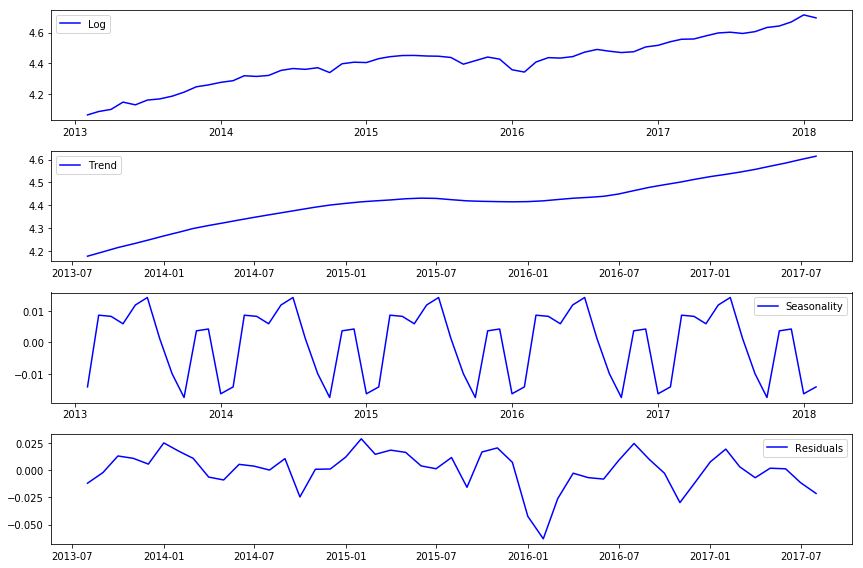

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(open_monthly_df))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(open_monthly_df), label='Log', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()